<a href="https://colab.research.google.com/github/afghaizzam21/Hydrate-in-Production-Line-/blob/main/Hydrate%20in%20Production%20Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/IPFest/SIMULATED_00001.csv')
df.head(10)

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2018-05-17 22:56:06.000000,27897490.0,19824230.0,125.6859,4059666.0,97.55283,NaN,NaN,NaN,0
1,2018-05-17 22:56:07.000000,27897450.0,19824230.0,125.6859,4059666.0,97.55283,NaN,NaN,NaN,0
2,2018-05-17 22:56:08.000000,27897360.0,19824230.0,125.6859,4059666.0,97.55283,NaN,NaN,NaN,0
3,2018-05-17 22:56:09.000000,27897430.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0
4,2018-05-17 22:56:10.000000,27897500.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0
5,2018-05-17 22:56:11.000000,27897310.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0
6,2018-05-17 22:56:12.000000,27897490.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0
7,2018-05-17 22:56:13.000000,27897450.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0
8,2018-05-17 22:56:14.000000,27897360.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0
9,2018-05-17 22:56:15.000000,27897430.0,19824230.0,125.6859,4059666.0,97.55281,NaN,NaN,NaN,0


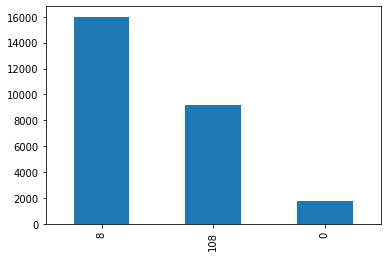

In [ ]:
df['class'].value_counts().plot(kind='bar')

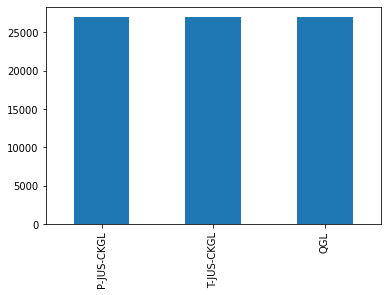

In [ ]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

In [ ]:
df = df.iloc[1:]
df.index = pd.to_datetime(df.timestamp, dayfirst=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26998 entries, 2018-05-17 22:56:07 to 2018-05-18 06:26:04
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   26998 non-null  object 
 1   P-PDG       26998 non-null  float64
 2   P-TPT       26998 non-null  float64
 3   T-TPT       26998 non-null  float64
 4   P-MON-CKP   26998 non-null  float64
 5   T-JUS-CKP   26998 non-null  float64
 6   P-JUS-CKGL  0 non-null      float64
 7   T-JUS-CKGL  0 non-null      float64
 8   QGL         0 non-null      float64
 9   class       26998 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
t = df['P-PDG'].any() or df['P-TPT'].any() or  df['T-TPT'].any()
t

True

In [ ]:
df.head()

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,,
2018-05-17 22:56:07,2018-05-17 22:56:07.000000,27897450.0,19824230.0,125.6859,4059666.0,97.55283,NaN,NaN,NaN,0
2018-05-17 22:56:08,2018-05-17 22:56:08.000000,27897360.0,19824230.0,125.6859,4059666.0,97.55283,NaN,NaN,NaN,0
2018-05-17 22:56:09,2018-05-17 22:56:09.000000,27897430.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0
2018-05-17 22:56:10,2018-05-17 22:56:10.000000,27897500.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0
2018-05-17 22:56:11,2018-05-17 22:56:11.000000,27897310.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0


In [ ]:
df.drop(columns=['timestamp','P-JUS-CKGL', 'T-JUS-CKGL','QGL'],inplace=True)
df.head()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
timestamp,,,,,,
2018-05-17 22:56:07,27897450.0,19824230.0,125.6859,4059666.0,97.55283,0
2018-05-17 22:56:08,27897360.0,19824230.0,125.6859,4059666.0,97.55283,0
2018-05-17 22:56:09,27897430.0,19824230.0,125.6859,4059666.0,97.55282,0
2018-05-17 22:56:10,27897500.0,19824230.0,125.6859,4059666.0,97.55282,0
2018-05-17 22:56:11,27897310.0,19824230.0,125.6859,4059666.0,97.55282,0


In [ ]:
for i in df.columns:
  if i != 'class':
    df['n-'+i] = (df[i]-df[i].mean())/df[i].std()

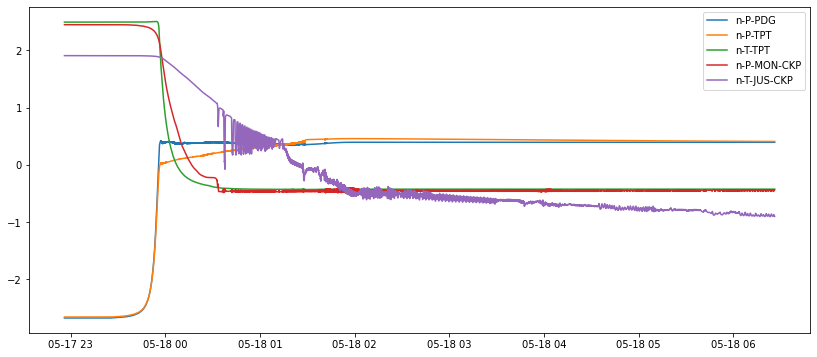

In [ ]:
plt.figure(figsize=(14, 6))
for i in df.columns:
  if (i[:2]=='n-' and i!='n-QGL'):
    plt.plot(df.index,df[i],label=i)
plt.legend()

In [ ]:
df[df['class']!=0]['class'].fillna(1)
df.loc[df['class']!=0,'class']=1

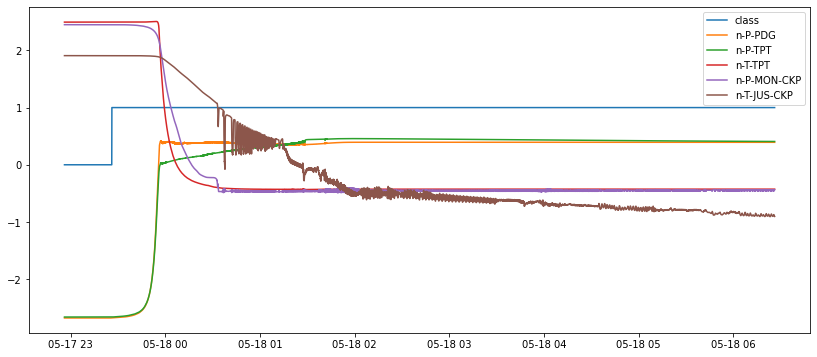

In [ ]:
plt.figure(figsize=(14, 6))
for i in df.columns:
  if (i[:2]=='n-' or i=='class' ):
    plt.plot(df.index,df[i],label=i)
plt.legend()

In [ ]:
df.columns

Index(['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'class', 'n-P-PDG',
       'n-P-TPT', 'n-T-TPT', 'n-P-MON-CKP', 'n-T-JUS-CKP'],
      dtype='object')

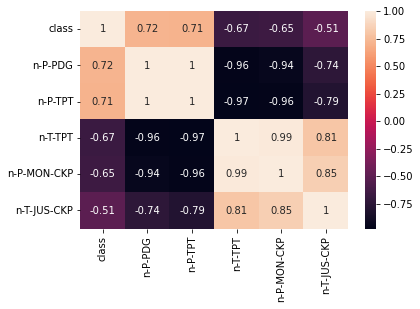

In [ ]:
sns.heatmap(df[['class', 'n-P-PDG',
       'n-P-TPT', 'n-T-TPT', 'n-P-MON-CKP', 'n-T-JUS-CKP']].corr(), annot=True)

In [ ]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization, Bidirectional, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical

In [ ]:
from sklearn.model_selection._split import _BaseKFold
from sklearn.utils.validation import indexable, _num_samples
from typing import List, Generator


class MonteCarloCV(_BaseKFold):

    def __init__(self,
                 n_splits: int,
                 train_size: float,
                 test_size: float,
                 gap: int = 0):
        """
        Monte Carlo Cross-Validation

        Holdout applied in multiple testing periods
        Testing origin (time-step where testing begins) is randomly chosen according to a monte carlo simulation

        :param n_splits: (int) Number of monte carlo repetitions in the procedure
        :param train_size: (float) Train size, in terms of ratio of the total length of the series
        :param test_size: (float) Test size, in terms of ratio of the total length of the series
        :param gap: (int) Number of samples to exclude from the end of each train set before the test set.
        """

        self.n_splits = n_splits
        self.n_samples = -1
        self.gap = gap
        self.train_size = train_size
        self.test_size = test_size
        self.train_n_samples = 0
        self.test_n_samples = 0

        self.mc_origins = []

    def split(self, X, y=None, groups=None) -> Generator:
        """Generate indices to split data into training and test set.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training data, where `n_samples` is the number of samples
            and `n_features` is the number of features.
        y : array-like of shape (n_samples,)
            Always ignored, exists for compatibility.
        groups : array-like of shape (n_samples,)
            Always ignored, exists for compatibility.
        Yields
        ------
        train : ndarray
            The training set indices for that split.
        test : ndarray
            The testing set indices for that split.
        """

        X, y, groups = indexable(X, y, groups)
        self.n_samples = _num_samples(X)

        self.train_n_samples = int(self.n_samples * self.train_size) - 1
        self.test_n_samples = int(self.n_samples * self.test_size) - 1

        # Make sure we have enough samples for the given split parameters
        if self.n_splits > self.n_samples:
            raise ValueError(
                f'Cannot have number of folds={self.n_splits} greater'
                f' than the number of samples={self.n_samples}.'
            )
        if self.train_n_samples - self.gap <= 0:
            raise ValueError(
                f'The gap={self.gap} is too big for number of training samples'
                f'={self.train_n_samples} with testing samples={self.test_n_samples} and gap={self.gap}.'
            )

        indices = np.arange(self.n_samples)

        selection_range = np.arange(self.train_n_samples + 1, self.n_samples - self.test_n_samples - 1)

        self.mc_origins = \
            np.random.choice(a=selection_range,
                             size=self.n_splits,
                             replace=True)

        for origin in self.mc_origins:
            if self.gap > 0:
                train_end = origin - self.gap + 1
            else:
                train_end = origin - self.gap
            train_start = origin - self.train_n_samples - 1

            test_end = origin + self.test_n_samples

            yield (
                indices[train_start:train_end],
                indices[origin:test_end],
            )

    def get_origins(self) -> List[int]:
        return self.mc_origins

In [ ]:
mccv = MonteCarloCV(n_splits=5, 
                    train_size=0.6, 
                    test_size=0.2, 
                    gap=0)

In [ ]:
X = df[['n-P-PDG','n-P-TPT', 'n-T-TPT', 'n-P-MON-CKP', 'n-T-JUS-CKP']].values
y = df['class'].values

In [ ]:
X

array([[-2.67840925, -2.6621424 ,  2.49416179,  2.44931581,  1.90802707],
       [-2.67845688, -2.6621424 ,  2.49416179,  2.44931581,  1.90802707],
       [-2.67841984, -2.6621424 ,  2.49416179,  2.44931581,  1.90802666],
       ...,
       [ 0.39267917,  0.40740001, -0.4261388 , -0.43893179, -0.90116594],
       [ 0.39271093,  0.40742233, -0.42614234, -0.4384754 , -0.90218468],
       [ 0.39271622,  0.40738512, -0.42613746, -0.43791759, -0.90309807]])

In [ ]:
for train_index, test_index in mccv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
X.shape

TRAIN: [ 1333  1334  1335 ... 17528 17529 17530] TEST: [17531 17532 17533 ... 22926 22927 22928]
TRAIN: [  840   841   842 ... 17035 17036 17037] TEST: [17038 17039 17040 ... 22433 22434 22435]
TRAIN: [ 3571  3572  3573 ... 19766 19767 19768] TEST: [19769 19770 19771 ... 25164 25165 25166]
TRAIN: [  428   429   430 ... 16623 16624 16625] TEST: [16626 16627 16628 ... 22021 22022 22023]
TRAIN: [  238   239   240 ... 16433 16434 16435] TEST: [16436 16437 16438 ... 21831 21832 21833]


(26998, 5)

In [ ]:
def make_model():
  model = Sequential()
  model.add(LSTM(128, dropout=0.2, input_shape=(5,1)))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model=KerasClassifier(build_fn=make_model)

<ipython-input-26-96a05120ddb5>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=make_model)


In [ ]:
X.shape

(26998, 5)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_search = {'epochs': [1,3],
                'batch_size': [32]}

gsearch = GridSearchCV(estimator=model, cv=mccv, param_grid=param_search)
gsearch.fit(X, y)

320/320 [==============================] - 2s 3ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 1/3
960/960 [==============================] - 10s 8ms/step - loss: 0.0601 - accuracy: 0.9843
Epoch 2/3
960/960 [==============================] - 8s 8ms/step - loss: 0.0350 - accuracy: 0.9910
Epoch 3/3
320/320 [==============================] - 2s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1/3
960/960 [==============================] - 10s 8ms/step - loss: 0.0920 - accuracy: 0.9731
Epoch 2/3
960/960 [==============================] - 7s 8ms/step - loss: 0.0554 - accuracy: 0.9846
Epoch 3/3
320/320 [==============================] - 2s 4ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 1/3
960/960 [==============================] - 10s 8ms/step - loss: 0.0343 - accuracy: 0.9943
Epoch 2/3
960/960 [==============================] - 8s 8ms/step - loss: 0.0160 - accuracy: 0.9963
Epoch 3/3
320/320 [==============================] - 2s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1/3
960/960

GridSearchCV(cv=MonteCarloCV(gap=0, n_splits=5, test_size=0.2, train_size=0.6),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f382df62490>,
             param_grid={'batch_size': [32], 'epochs': [1, 3]})

In [ ]:
model = make_model()
history = model.fit(X[0:2500*2], to_categorical(y[0:2500*2],2), epochs=3, batch_size=128, validation_data=(X, to_categorical(y,2)),
                    verbose=1)
  

Epoch 1/3
40/40 [==============================] - 6s 75ms/step - loss: 0.6069 - accuracy: 0.6498 - val_loss: 0.1567 - val_accuracy: 0.9386
Epoch 2/3
40/40 [==============================] - 2s 60ms/step - loss: 0.5221 - accuracy: 0.6716 - val_loss: 0.0948 - val_accuracy: 0.9701
Epoch 3/3
40/40 [==============================] - 2s 59ms/step - loss: 0.5001 - accuracy: 0.6796 - val_loss: 0.0918 - val_accuracy: 0.9801


In [ ]:
from sklearn.metrics import classification_report
pred = model.predict(X)
print(classification_report(y, pred.argmax(axis=1)))

844/844 [==============================] - 6s 6ms/step
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1799
           1       1.00      0.98      0.99     25199

    accuracy                           0.98     26998
   macro avg       0.88      0.99      0.93     26998
weighted avg       0.98      0.98      0.98     26998



In [ ]:
soal = pd.read_csv('/content/drive/MyDrive/IPFest/WELL-00020_20120410192326.csv')
soal['class']=soal['class'].fillna(method='ffill')
soal.loc[soal['class']!=0,'class']=1

In [ ]:
soal = soal.iloc[1:]
soal.index = pd.to_datetime(soal.timestamp, dayfirst=True)

In [ ]:
soal.drop(columns=['timestamp','P-JUS-CKGL', 'T-JUS-CKGL'],inplace=True)
for i in soal.columns:
  if i != 'class':
    soal['n-'+i] = (soal[i]-soal[i].mean())/soal[i].std()

In [ ]:
predict = model.predict(soal[['n-P-PDG','n-P-TPT', 'n-T-TPT', 'n-P-MON-CKP', 'n-T-JUS-CKP']].values)

491/491 [==============================] - 3s 6ms/step


In [ ]:
print(classification_report(soal['class'], predict.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.01      1.00      0.03       200
         1.0       0.00      0.00      0.00     15487

    accuracy                           0.01     15687
   macro avg       0.01      0.50      0.01     15687
weighted avg       0.00      0.01      0.00     15687



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
